# 사전 지식

슈뢰딩거 방정식은 양자역학적 계의 시간에 따른 변화를 나타내는 방정식입니다. 이것을 직접 해결하는 것은 쉽지 않지만, 시간에 따라 변화하지 않는 정상파와 같은 계의 경우에는 방정식을 좀 더 간단하게 만들 수 있습니다. 이론적인 내용은 Griffiths와 같은 양자역학 교재를 참조하세요.

시간 독립 슈뢰딩거 방정식은 다음과 같이 표현됩니다:
$$
H \Psi = E \Psi.
$$

이때 $E$는 계의 에너지를 나타내는 스칼라값이고, 
$$
H = -\frac{\hbar^2}{2m} \frac{d^2}{dt^2} + V
$$
입니다. 이때 $H$는 선형 연산자이기 때문에 시간 비의존 슈뢰딩거 방정식은 고윳값 문제로 변형될 수 있습니다.

이 문제에서는 컴퓨터로 고윳값 문제를 해결하기 위해서 선형 연산자를 행렬로 근사해 사용합니다. 이때
$$
-\frac{\hbar^2}{2m} \frac{d^2}{dt^2} \Psi = -\frac{\hbar^2}{2m} L \Psi,
$$
$$
V \Psi = \begin{bmatrix}
V(x_\text{min}) & 0 & 0 & \dots & 0 \\
0 & V(x_\text{min} + \Delta) & 0 & \dots & 0 \\
0 & 0 & V(x_\text{min} + 2 \Delta) & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & V(x_\text{max})
\end{bmatrix} \Psi
$$
입니다. 위쪽 식에서 등장한 $L$은
$$
L_{ij} = 
\begin{cases}
-2 & (i = j) \\
1 & (|i - j| = 1) \\
0 & (\text{otherwise})
\end{cases}
$$
즉,
$$
L = \begin{bmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \dots & 0 \\
0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & -2
\end{bmatrix}
$$
입니다.

# 문제

이차함수 $U(x) = ax^2$ 꼴의 퍼텐셜 에너지를 가지는 계에서 입자의 파동함수를 에너지가 낮은 순서대로 세 개를 계산하고, 이를 표시하세요

> 저는 이 문제를 해결하기 위해서 인터넷을 많이 참조했고, 그럼에도 시간이 많이 걸렸습니다. 문제 난이도가 다른 문제보다 더 높기 때문에 아래에 해설을 덧붙여 놓았습니다. 참조하면서 풀어보세요.
> 
> 표시 방법은 자유입니다. 아래에 제시된 방법보다 더 좋은 아이디어를 떠올렸다면 공유해 주시기 바랍니다.

## 힌트

일반적으로 이러한 종류의 문제는 변수를 **무차원화**해서 해결하는 경우가 많습니다. 위치 범위를 -1에서 1로 두고, 모든 상수를 1로 설정한 다음 풀어보세요

In [1]:
# 여기에 코드를 작성하세요


# 모범 답안

In [2]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

필요한 패키지들을 임포트하는 것은 이제 익숙할 것입니다.

In [3]:
n = 1000
hbar = 1
m = 1
x_min, x_max = -1, 1

`n`은 근사의 정밀도, 즉 함수를 몇 개의 점으로 근사할지를 결정하는 값입니다. 자주 사용되는 값은 직접 코드에 넣는 것(하드코딩)보다는 변수에 저장하는 것이 나중에 값을 바꾸는 데 편리하겠죠?

`hbar`는 플랑크 상수, `m`은 입자의 질량, `x_min`과 `x_max`는 입자의 위치 범위입니다. 모두 단위 크기로 설정합니다. 자세한 내용은 [여기](http://www.eg.bucknell.edu/~mligare/python_projects/quantum/finiteDifference_sw.html)를 참조하세요.

In [4]:
x = np.linspace(x_min, x_max, n)
dx = (x_max - x_min)/(n + 1)
potential = 100 * x ** 2

함수를 근사할 점들을 지정해 `x`에 보관합니다. `dx`는 점들 사이의 간격을 의미합니다.

`potential`은 각 점에서 포텐셜 에너지의 크기를 의미합니다. 여기에서는 계수로 100을 사용했지만 달라도 괜찮습니다. 다만 그 값이 너무 작거나 너무 크면 결과가 뚜렷히 드러나지 않을 수도 있습니다.

In [5]:
coeff = -2 * np.identity(n)
idx = np.arange(n - 1)
coeff[idx, idx + 1] = 1
coeff[idx + 1, idx] = 1

행렬 $L$을 생성하는 코드입니다. 기교적인 부분이 많이 들어가 있지만, 1장에서 배우지 않은 내용이 사용된 것은 없으니 흐름을 직접 따라가 보시기 바랍니다.

In [6]:

T = -(hbar ** 2) / (2 * m) * coeff / (dx ** 2)
V = np.identity(n) * potential
H = T + V

해밀토니안 $H$를 계산하는 부분입니다.

In [7]:

eigval, eigvec = eigh(H)

행렬 $H$의 고윳값과 고유벡터를 계산하는, 이 코드에서 가장 핵심적인 부분입니다. $H$가 대칭이기 때문에 `eigh`를 사용할 수 있습니다.

`i`번째 고윳값 `eigval[i]`에 대응되는 고유벡터는 `eigvec[:, i]`임을 기억하세요.

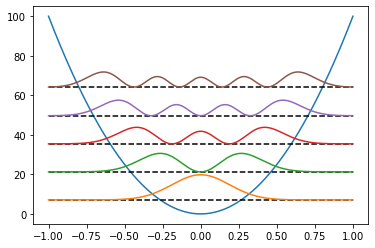

In [8]:
scale = 3000
plt.plot(x, potential)
for i in range(5):
    plt.plot(x, np.ones((n, 1)) * eigval[i], "k--")
    plt.plot(x, eigval[i] + eigvec[:, i] ** 2 * scale)
plt.show()

각 파동함수의 에너지와 지점에 따른 존재 확률을 표시하는 부분입니다.

각 파동함수의 에너지 부분에 검은색 점선으로 기준선을 표시하고, 파동함수값을 제곱해 각 지점에서의 존재 확률을 나타냈습니다.

그런데 $y$축은 에너지를 나타내기 때문에 존재 확률을 적절히 표시하기 위해서는 적당한 양의 배수를 곱해주어야 합니다.

전체 코드는 다음과 같습니다.



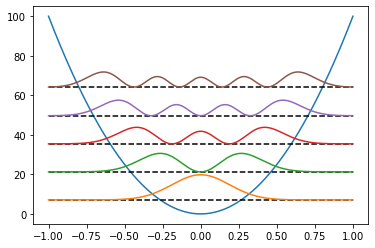

In [9]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt


n = 1000
hbar = 1
m = 1
x_min, x_max = -1, 1

x = np.linspace(x_min, x_max, n)
dx = (x_max - x_min)/(n + 1)
potential = 100 * x ** 2

coeff = -2 * np.identity(n)
idx = np.arange(n - 1)
coeff[idx, idx + 1] = 1
coeff[idx + 1, idx] = 1

T = -(hbar ** 2) / (2 * m) * coeff / (dx ** 2)
V = np.identity(n) * potential
H = T + V

eigval, eigvec = eigh(H)

scale = 3000
plt.plot(x, potential)
for i in range(5):
    plt.plot(x, np.ones((n, 1)) * eigval[i], "k--")
    plt.plot(x, eigval[i] + eigvec[:, i] ** 2 * scale)
plt.show()
